Inference for Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plots
import pandas as pd

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table[y])/np.std(table[x])

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table[y]) - a * np.mean(table[x])

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table[x] + b

def scatter_fit(table, x, y):
    plots.scatter(table[x], table[y], s=20)
    plots.plot(table[x], fit(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

In [3]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    eps = np.random.normal(0, 6, sample_size)
    y = (true_slope*x + true_int) + eps
    tyche = pd.DataFrame({
        'x': x,
        'y': y
    })

    plots.figure(figsize=(6, 16))
    plots.subplot(4, 1, 1)
    plots.scatter(tyche['x'], tyche['y'], s=20)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    plots.subplot(4, 1, 2)
    plots.scatter(tyche['x'],tyche['y'], s=20)
    plots.title('What We Get to See')

    plots.subplot(4, 1, 3)
    scatter_fit(tyche, 'x', 'y')
    plots.xlabel("")
    plots.ylabel("")
    plots.title('Regression Line: Estimate of True Line')

    plots.subplot(4, 1, 4)
    scatter_fit(tyche, 'x', 'y')
    plots.ylabel("")
    xlims = np.array([np.min(tyche['x']), np.max(tyche['x'])])
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

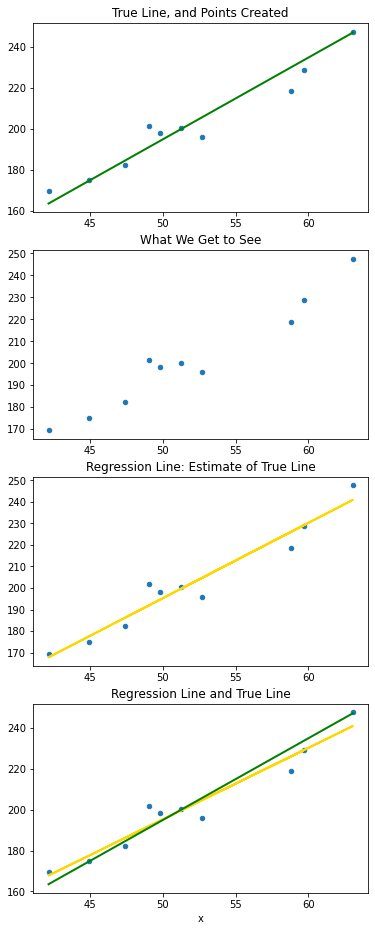

In [4]:
draw_and_compare(4, -5, 10)

Inference for the True Slope

In [5]:
path="C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/"
baby=pd.read_csv(path+"baby.csv")
#baby

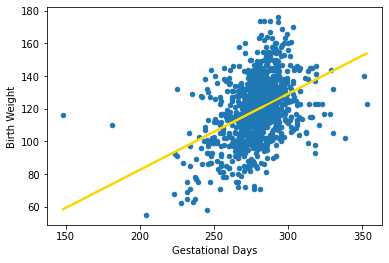

In [6]:
scatter_fit(baby, 'Gestational Days', 'Birth Weight')

In [7]:
correlation(baby, 'Gestational Days', 'Birth Weight')

0.4075427933888511

In [8]:
slope(baby, 'Gestational Days', 'Birth Weight')

0.4665568769492152

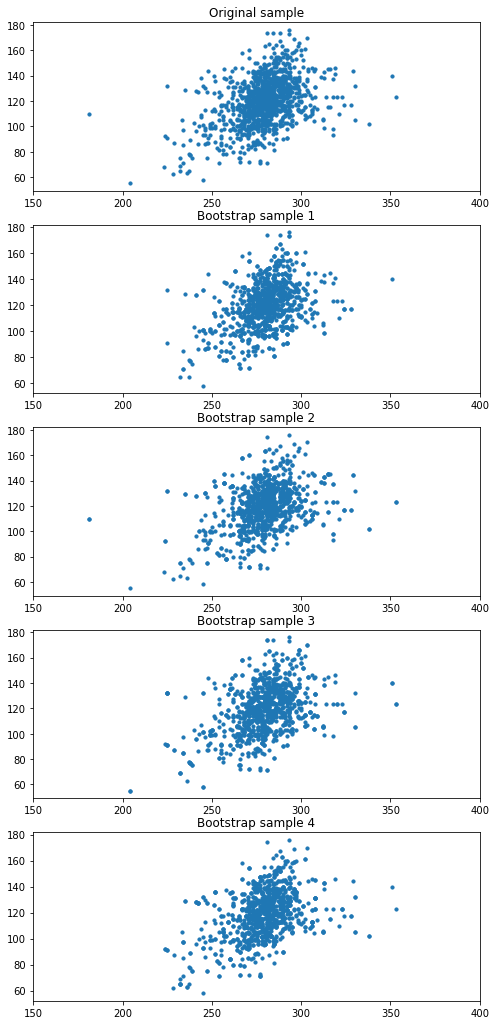

In [9]:
plots.figure(figsize=(8, 18))
plots.subplot(5, 1, 1)
plots.scatter(baby['Gestational Days'], baby['Birth Weight'], s=10)
plots.xlim([150, 400])
plots.title('Original sample')

for i in np.arange(1, 5, 1):
    plots.subplot(5,1,i+1)
    rep = baby.sample(replace=True,frac=1)
    plots.scatter(rep['Gestational Days'], rep['Birth Weight'], s=10)
    plots.xlim([150, 400])
    plots.title('Bootstrap sample '+str(i))

Estimating the True Slope

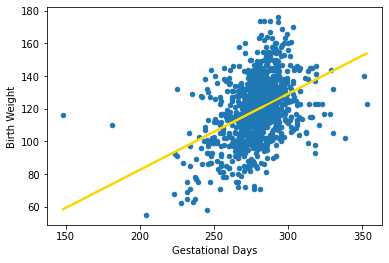

In [10]:
scatter_fit(baby, 'Gestational Days', 'Birth Weight')

In [11]:
correlation(baby, 'Gestational Days', 'Birth Weight')

0.4075427933888511

In [12]:
slope(baby, 'Gestational Days', 'Birth Weight')

0.4665568769492152

Bootstrapping the Scatter Plot 

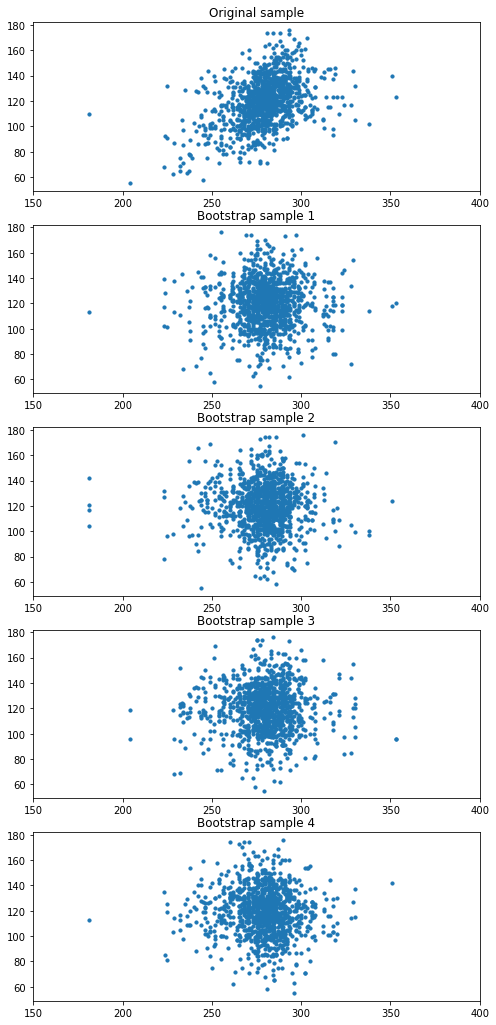

In [13]:
plots.figure(figsize=(8, 18))
plots.subplot(5, 1, 1)
plots.scatter(baby['Gestational Days'], baby['Birth Weight'], s=10)
plots.xlim([150, 400])
plots.title('Original sample')

for i in np.arange(1, 5, 1):
    plots.subplot(5,1,i+1)
    rep = baby.sample(replace=True,frac=1)
    plots.scatter(rep['Gestational Days'], baby['Birth Weight'], s=10)
    plots.xlim([150, 400])
    plots.title('Bootstrap sample '+str(i))

Estimating the True Slope 

array([[<AxesSubplot:title={'center':'Bootstrap Slopes'}>]], dtype=object)

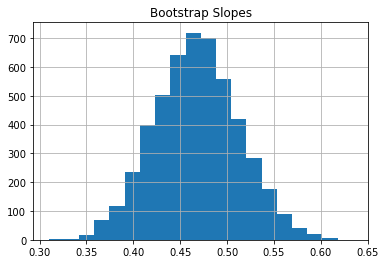

In [14]:
slopes = []
for i in np.arange(5000):
    bootstrap_sample = baby.sample(replace=True,frac=1)
    bootstrap_slope = slope(bootstrap_sample, 'Gestational Days', 'Birth Weight')
    slopes = np.append(slopes, bootstrap_slope)
pd.DataFrame({'Bootstrap Slopes':slopes}).hist(bins=20)

In [15]:
def percentile(percent,arr):
    arr=np.sort(arr)
    out=(percent/100)*len(arr)
    out=int(out)
    return arr[out]

In [16]:
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
left, right

(0.38155187951354924, 0.5580194724312413)

A Function to Bootstrap the Slope

In [17]:
def bootstrap_slope(table, x, y, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter, get the slope of the regression line,
    # augment the list of generated slopes
    slopes = []
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample(replace=True,frac=1)
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)
    
    # Display results
    pd.DataFrame({'Bootstrap Slopes': slopes}).hist(bins=20)
    plots.plot([left,right], [0,0], color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the true slope:')
    print(left, right)

Slope of regression line: 0.4665568769492152
Approximate 95%-confidence interval for the true slope:
0.380421832251041 0.5579034024169697


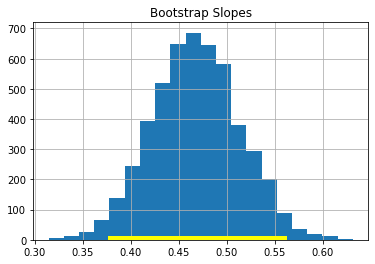

In [18]:
bootstrap_slope(baby, 'Gestational Days', 'Birth Weight', 5000)

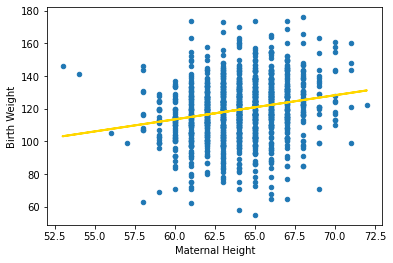

In [19]:
scatter_fit(baby, 'Maternal Height', 'Birth Weight')

In [20]:
correlation(baby, 'Maternal Height', 'Birth Weight')

0.20370417718968034

Slope of regression line: 1.478019351928433
Approximate 95%-confidence interval for the true slope:
1.0452460453415682 1.9049790026790878


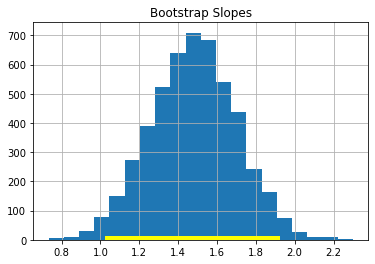

In [21]:
bootstrap_slope(baby, 'Maternal Height', 'Birth Weight', 5000)

Could the True Slope Be 0?

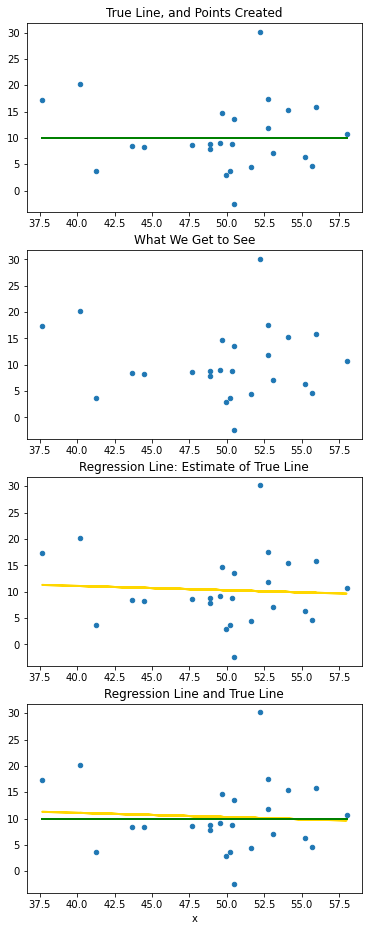

In [22]:
draw_and_compare(0, 10, 25)

In [23]:
slope(baby, 'Maternal Age', 'Birth Weight')

0.08500766941582513

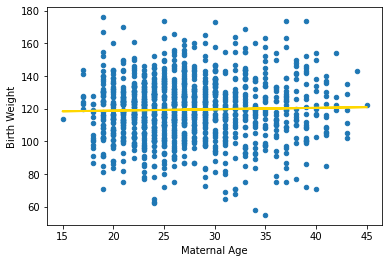

In [24]:
scatter_fit(baby, 'Maternal Age', 'Birth Weight')

Slope of regression line: 0.08500766941582513
Approximate 95%-confidence interval for the true slope:
-0.10729973689691145 0.27437589939676454


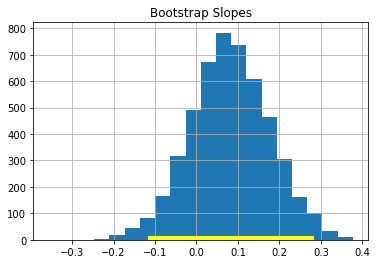

In [25]:
bootstrap_slope(baby, 'Maternal Age', 'Birth Weight', 5000)

Prediction Intervals

(0.0, 200.0)

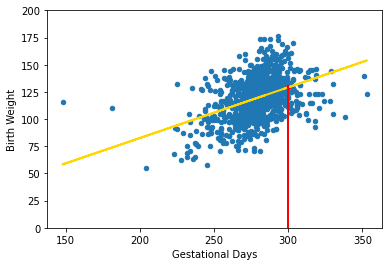

In [26]:
scatter_fit(baby, 'Gestational Days', 'Birth Weight')
s = slope(baby, 'Gestational Days', 'Birth Weight')
i = intercept(baby, 'Gestational Days', 'Birth Weight')
fit_300 = s*300 + i
plots.scatter(300, fit_300, color='red', s=20)
plots.plot([300,300], [0, fit_300], color='red', lw=2)
plots.ylim([0, 200])

In [27]:
def fitted_value(table, x, y, given_x):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * given_x  + b

In [28]:
fit_300 = fitted_value(baby, 'Gestational Days', 'Birth Weight', 300)
fit_300

129.2129241703143

The Variability of the Prediction

In [29]:
# HIDDEN 

x = 300

x = 300

data = []
for i in range(10):
    rep = baby.sample(len(baby), replace=True)
    a = slope(rep, 'Gestational Days', 'Birth Weight')
    b = intercept(rep, 'Gestational Days', 'Birth Weight')
    data.append([a, b])
lines = pd.DataFrame(data)
lines = lines.rename(columns={0:'slope', 1:'intercept'})
lines['prediction at x='+str(x)] = lines['slope']*x + lines['intercept']

lines

,slope,intercept,prediction at x=300
0,0.480481,-14.855682,129.288605
1,0.510573,-23.311711,129.860289
2,0.470271,-12.641696,128.439718
3,0.485350,-15.917299,129.687564
4,0.461345,-9.650698,128.752742
5,0.493765,-18.078420,130.050983
6,0.460937,-9.130077,129.151008
7,0.502463,-19.704911,131.034104
8,0.481171,-14.643160,129.708039
9,0.457817,-8.057985,129.287208


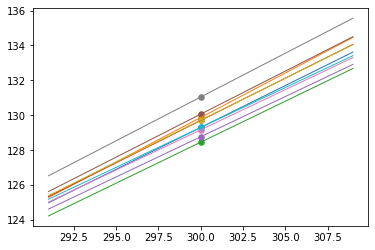

In [30]:
xlims = np.array([291, 309])
left = xlims[0]*lines['slope'] + lines['intercept']
right = xlims[1]*lines['slope'] + lines['intercept']
fit_x = x*lines['slope'] + lines['intercept']

for i in range(10):
    plots.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plots.scatter(x, fit_x[i], s=30)

In [31]:
lines

,slope,intercept,prediction at x=300
0,0.480481,-14.855682,129.288605
1,0.510573,-23.311711,129.860289
2,0.470271,-12.641696,128.439718
3,0.485350,-15.917299,129.687564
4,0.461345,-9.650698,128.752742
5,0.493765,-18.078420,130.050983
6,0.460937,-9.130077,129.151008
7,0.502463,-19.704911,131.034104
8,0.481171,-14.643160,129.708039
9,0.457817,-8.057985,129.287208


Bootstrap Prediction Interval

In [32]:
# Bootstrap prediction of variable y at new_x
# Data contained in table; prediction by regression of y based on x
# repetitions = number of bootstrap replications of the original scatter plot

def bootstrap_prediction(table, x, y, new_x, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter; 
    # get the regression prediction at new_x; 
    # augment the predictions list
    predictions = []
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample(len(table), replace = True)
        bootstrap_prediction = fitted_value(bootstrap_sample, x, y, new_x)
        predictions.append(bootstrap_prediction)
        
    # Find the ends of the approximate 95% prediction interval
    left = np.percentile(predictions, 2.5)
    right = np.percentile(predictions, 97.5)
    
    # Prediction based on original sample
    original = fitted_value(table, x, y, new_x)
    
    # Display results
    pd.DataFrame({'Prediction': predictions}).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot(np.array([left, right]), np.array([0, 0]), color='yellow', lw=8);
    print('Height of regression line at x='+str(new_x)+':', original)
    print('Approximate 95%-confidence interval:')
    print(left, right)

Height of regression line at x=300: 129.2129241703143
Approximate 95%-confidence interval:
127.2501820687991 131.28116980194181


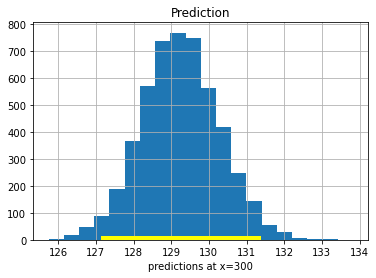

In [33]:
bootstrap_prediction(baby, 'Gestational Days', 'Birth Weight', 300, 5000)

The Effect of Changing the Value of the Predictor 

Height of regression line at x=285: 122.21457101607608
Approximate 95%-confidence interval:
121.17231008409392 123.26507645613229


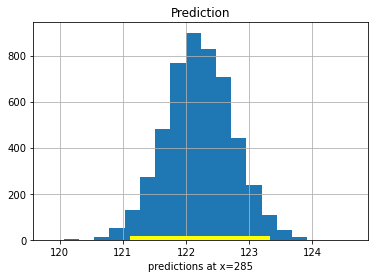

In [34]:
bootstrap_prediction(baby, 'Gestational Days', 'Birth Weight', 285, 5000)

In [35]:
np.mean(baby['Gestational Days'])

279.1013628620102

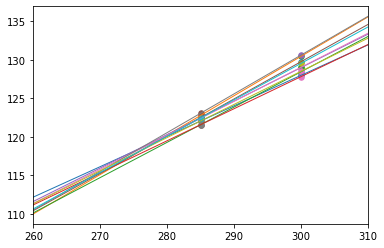

In [36]:
x1 = 300
x2 = 285

data = []
for i in range(10):
    rep = baby.sample(len(baby), replace=True)
    a = slope(rep, 'Gestational Days', 'Birth Weight')
    b = intercept(rep, 'Gestational Days', 'Birth Weight')
    data.append([a, b])

lines = pd.DataFrame(data)
lines = lines.rename(columns={0: 'slope', 1:'intercept'})

xlims = np.array([260, 310])
left = xlims[0]*lines['slope'] + lines['intercept']
right = xlims[1]*lines['slope'] + lines['intercept']
fit_x1 = x1*lines['slope'] + lines['intercept']
fit_x2 = x2*lines['slope'] + lines['intercept']

plots.xlim(xlims)
for i in range(10):
    plots.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plots.scatter(x1, fit_x1[i], s=30)
    plots.scatter(x2, fit_x2[i], s=30)

End of Chapter 16
